<a href="https://colab.research.google.com/github/anand-bits/AI_ML_learning_project/blob/main/Anc_Project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
data = pd.read_csv("/content/cicddos2019_dataset.csv", error_bad_lines=False)

data.head()

<ipython-input-62-c6b5fcb746bc>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv("/content/cicddos2019_dataset.csv", error_bad_lines=False)


,Unnamed: 0,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Class
0,0,17,216631,6,0,2088.0,0.0,393.0,321.0,348.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack
1,1,17,2,2,0,802.0,0.0,401.0,401.0,401.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack
2,2,17,48,2,0,766.0,0.0,383.0,383.0,383.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack
3,3,17,107319,4,0,1398.0,0.0,369.0,330.0,349.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack
4,4,17,107271,4,0,1438.0,0.0,389.0,330.0,359.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack


In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431371 entries, 0 to 431370
Data columns (total 80 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                431371 non-null  int64  
 1   Protocol                  431371 non-null  int64  
 2   Flow Duration             431371 non-null  int64  
 3   Total Fwd Packets         431371 non-null  int64  
 4   Total Backward Packets    431371 non-null  int64  
 5   Fwd Packets Length Total  431371 non-null  float64
 6   Bwd Packets Length Total  431371 non-null  float64
 7   Fwd Packet Length Max     431371 non-null  float64
 8   Fwd Packet Length Min     431371 non-null  float64
 9   Fwd Packet Length Mean    431371 non-null  float64
 10  Fwd Packet Length Std     431371 non-null  float64
 11  Bwd Packet Length Max     431371 non-null  float64
 12  Bwd Packet Length Min     431371 non-null  float64
 13  Bwd Packet Length Mean    431371 non-null  f

In [64]:
label_counts = data['Label'].value_counts()
print(label_counts)

DrDoS_NTP        121368
TFTP              98917
Benign            97831
Syn               49373
UDP               18090
DrDoS_UDP         10420
UDP-lag            8872
MSSQL              8523
DrDoS_MSSQL        6212
DrDoS_DNS          3669
DrDoS_SNMP         2717
LDAP               1906
DrDoS_LDAP         1440
Portmap             685
NetBIOS             644
DrDoS_NetBIOS       598
UDPLag               55
WebDDoS              51
Name: Label, dtype: int64


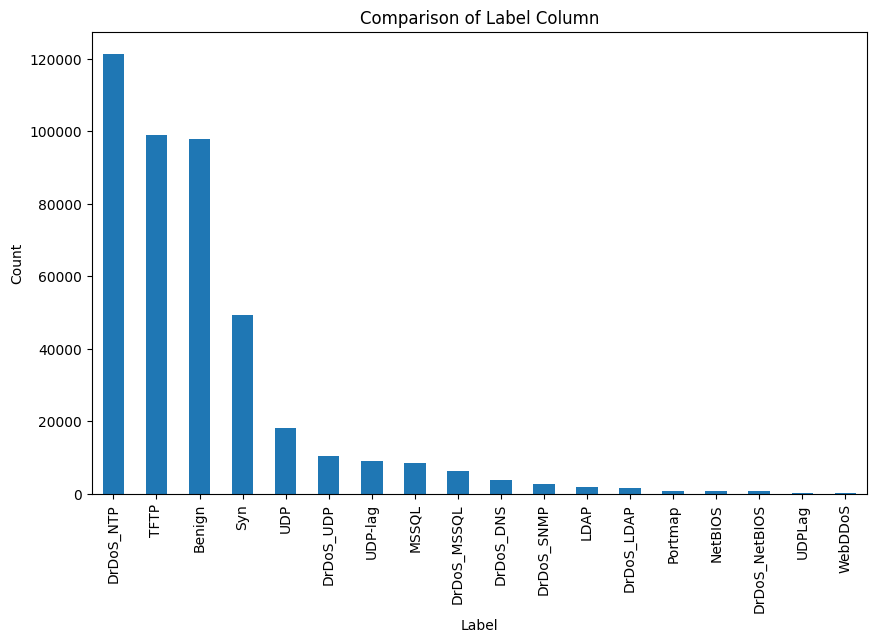

In [65]:
plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar')
plt.title('Comparison of Label Column')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [66]:
col_name_consistency = {
'Flow ID': 'Flow ID',
'Source IP': 'Source IP',
'Src IP':  'Source IP',
'Source Port': 'Source Port',
'Src Port': 'Source Port',
'Destination IP': 'Destination IP',
'Dst IP': 'Destination IP',
'Destination Port': 'Destination Port',
'Dst Port': 'Destination Port',
'Protocol': 'Protocol',
'Timestamp': 'Timestamp',
'Flow Duration': 'Flow Duration',
'Total Fwd Packets': 'Total Fwd Packets',
'Tot Fwd Pkts': 'Total Fwd Packets',
'Total Backward Packets': 'Total Backward Packets',
'Tot Bwd Pkts': 'Total Backward Packets',
'Total Length of Fwd Packets': 'Fwd Packets Length Total',
'TotLen Fwd Pkts': 'Fwd Packets Length Total',
'Total Length of Bwd Packets': 'Bwd Packets Length Total',
'TotLen Bwd Pkts': 'Bwd Packets Length Total',
'Fwd Packet Length Max': 'Fwd Packet Length Max',
'Fwd Pkt Len Max': 'Fwd Packet Length Max',
'Fwd Packet Length Min': 'Fwd Packet Length Min',
'Fwd Pkt Len Min': 'Fwd Packet Length Min',
'Fwd Packet Length Mean': 'Fwd Packet Length Mean',
'Fwd Pkt Len Mean': 'Fwd Packet Length Mean',
'Fwd Packet Length Std': 'Fwd Packet Length Std',
'Fwd Pkt Len Std': 'Fwd Packet Length Std',
'Bwd Packet Length Max': 'Bwd Packet Length Max',
'Bwd Pkt Len Max': 'Bwd Packet Length Max',
'Bwd Packet Length Min': 'Bwd Packet Length Min',
'Bwd Pkt Len Min': 'Bwd Packet Length Min',
'Bwd Packet Length Mean': 'Bwd Packet Length Mean',
'Bwd Pkt Len Mean': 'Bwd Packet Length Mean',
'Bwd Packet Length Std': 'Bwd Packet Length Std',
'Bwd Pkt Len Std': 'Bwd Packet Length Std',
'Flow Bytes/s': 'Flow Bytes/s',
'Flow Byts/s': 'Flow Bytes/s',
'Flow Packets/s': 'Flow Packets/s',
'Flow Pkts/s': 'Flow Packets/s',
'Flow IAT Mean': 'Flow IAT Mean',
'Flow IAT Std': 'Flow IAT Std',
'Flow IAT Max': 'Flow IAT Max',
'Flow IAT Min': 'Flow IAT Min',
'Fwd IAT Total': 'Fwd IAT Total',
'Fwd IAT Tot': 'Fwd IAT Total',
'Fwd IAT Mean': 'Fwd IAT Mean',
'Fwd IAT Std': 'Fwd IAT Std',
'Fwd IAT Max': 'Fwd IAT Max',
'Fwd IAT Min': 'Fwd IAT Min',
'Bwd IAT Total': 'Bwd IAT Total',
'Bwd IAT Tot': 'Bwd IAT Total',
'Bwd IAT Mean': 'Bwd IAT Mean',
'Bwd IAT Std': 'Bwd IAT Std',
'Bwd IAT Max': 'Bwd IAT Max',
'Bwd IAT Min': 'Bwd IAT Min',
'Fwd PSH Flags': 'Fwd PSH Flags',
'Bwd PSH Flags': 'Bwd PSH Flags',
'Fwd URG Flags': 'Fwd URG Flags',
'Bwd URG Flags': 'Bwd URG Flags',
'Fwd Header Length': 'Fwd Header Length',
'Fwd Header Len': 'Fwd Header Length',
'Bwd Header Length': 'Bwd Header Length',
'Bwd Header Len': 'Bwd Header Length',
'Fwd Packets/s': 'Fwd Packets/s',
'Fwd Pkts/s': 'Fwd Packets/s',
'Bwd Packets/s': 'Bwd Packets/s',
'Bwd Pkts/s': 'Bwd Packets/s',
'Min Packet Length': 'Packet Length Min',
'Pkt Len Min': 'Packet Length Min',
'Max Packet Length': 'Packet Length Max',
'Pkt Len Max': 'Packet Length Max',
'Packet Length Mean': 'Packet Length Mean',
'Pkt Len Mean': 'Packet Length Mean',
'Packet Length Std': 'Packet Length Std',
'Pkt Len Std': 'Packet Length Std',
'Packet Length Variance': 'Packet Length Variance',
'Pkt Len Var': 'Packet Length Variance',
'FIN Flag Count': 'FIN Flag Count',
'FIN Flag Cnt': 'FIN Flag Count',
'SYN Flag Count': 'SYN Flag Count',
'SYN Flag Cnt': 'SYN Flag Count',
'RST Flag Count': 'RST Flag Count',
'RST Flag Cnt': 'RST Flag Count',
'PSH Flag Count': 'PSH Flag Count',
'PSH Flag Cnt': 'PSH Flag Count',
'ACK Flag Count': 'ACK Flag Count',
'ACK Flag Cnt': 'ACK Flag Count',
'URG Flag Count': 'URG Flag Count',
'URG Flag Cnt': 'URG Flag Count',
'CWE Flag Count': 'CWE Flag Count',
'CWE Flag Cnt': 'CWE Flag Count',
'ECE Flag Count': 'ECE Flag Count',
'ECE Flag Cnt': 'ECE Flag Count',
'Down/Up Ratio': 'Down/Up Ratio',
'Average Packet Size': 'Avg Packet Size',
'Pkt Size Avg': 'Avg Packet Size',
'Avg Fwd Segment Size': 'Avg Fwd Segment Size',
'Fwd Seg Size Avg': 'Avg Fwd Segment Size',
'Avg Bwd Segment Size': 'Avg Bwd Segment Size',
'Bwd Seg Size Avg': 'Avg Bwd Segment Size',
'Fwd Avg Bytes/Bulk': 'Fwd Avg Bytes/Bulk',
'Fwd Byts/b Avg': 'Fwd Avg Bytes/Bulk',
'Fwd Avg Packets/Bulk': 'Fwd Avg Packets/Bulk',
'Fwd Pkts/b Avg': 'Fwd Avg Packets/Bulk',
'Fwd Avg Bulk Rate': 'Fwd Avg Bulk Rate',
'Fwd Blk Rate Avg': 'Fwd Avg Bulk Rate',
'Bwd Avg Bytes/Bulk': 'Bwd Avg Bytes/Bulk',
'Bwd Byts/b Avg': 'Bwd Avg Bytes/Bulk',
'Bwd Avg Packets/Bulk': 'Bwd Avg Packets/Bulk',
'Bwd Pkts/b Avg': 'Bwd Avg Packets/Bulk',
'Bwd Avg Bulk Rate': 'Bwd Avg Bulk Rate',
'Bwd Blk Rate Avg': 'Bwd Avg Bulk Rate',
'Subflow Fwd Packets': 'Subflow Fwd Packets',
'Subflow Fwd Pkts': 'Subflow Fwd Packets',
'Subflow Fwd Bytes': 'Subflow Fwd Bytes',
'Subflow Fwd Byts': 'Subflow Fwd Bytes',
'Subflow Bwd Packets': 'Subflow Bwd Packets',
'Subflow Bwd Pkts': 'Subflow Bwd Packets',
'Subflow Bwd Bytes': 'Subflow Bwd Bytes',
'Subflow Bwd Byts': 'Subflow Bwd Bytes',
'Init_Win_bytes_forward': 'Init Fwd Win Bytes',
'Init Fwd Win Byts': 'Init Fwd Win Bytes',
'Init_Win_bytes_backward': 'Init Bwd Win Bytes',
'Init Bwd Win Byts': 'Init Bwd Win Bytes',
'act_data_pkt_fwd': 'Fwd Act Data Packets',
'Fwd Act Data Pkts': 'Fwd Act Data Packets',
'min_seg_size_forward': 'Fwd Seg Size Min',
'Fwd Seg Size Min': 'Fwd Seg Size Min',
'Active Mean': 'Active Mean',
'Active Std': 'Active Std',
'Active Max': 'Active Max',
'Active Min': 'Active Min',
'Idle Mean': 'Idle Mean',
'Idle Std': 'Idle Std',
'Idle Max': 'Idle Max',
'Idle Min': 'Idle Min',
'Label': 'Label'
}

In [67]:
drop_columns = [ # this list includes all spellings across CIC NIDS datasets
    "Flow ID",
    'Fwd Header Length.1',
    "Source IP", "Src IP",
    "Source Port", "Src Port",
    "Destination IP", "Dst IP",
    "Destination Port", "Dst Port",
    "Timestamp",
]

In [71]:
import pandas as pd

# List of CSV file paths, including the "/content/cicddos2019_dataset.csv"
dspaths = ["/content/cicddos2019_dataset.csv"]  # Add paths to other CSV files if needed

# Read the CSV files into a list of individual DataFrames
individual_dfs = [pd.read_csv(dspath, sep=',', encoding='utf-8', error_bad_lines=False) for dspath in dspaths]

# Display the shapes of the individual DataFrames
shapes = [i.shape for i in individual_dfs]
print(shapes)

# If you want to display the first few rows of each DataFrame
for i, df in enumerate(individual_dfs):
    print(f"DataFrame {i} - Shape: {df.shape}")
    print(df.head())


<ipython-input-71-e76d1ac225a5>:7: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  individual_dfs = [pd.read_csv(dspath, sep=',', encoding='utf-8', error_bad_lines=False) for dspath in dspaths]


[(431371, 80)]
DataFrame 0 - Shape: (431371, 80)
   Unnamed: 0  Protocol  Flow Duration  Total Fwd Packets  \
0           0        17         216631                  6   
1           1        17              2                  2   
2           2        17             48                  2   
3           3        17         107319                  4   
4           4        17         107271                  4   

   Total Backward Packets  Fwd Packets Length Total  Bwd Packets Length Total  \
0                       0                    2088.0                       0.0   
1                       0                     802.0                       0.0   
2                       0                     766.0                       0.0   
3                       0                    1398.0                       0.0   
4                       0                    1438.0                       0.0   

   Fwd Packet Length Max  Fwd Packet Length Min  Fwd Packet Length Mean  ...  \
0                

In [72]:
for df in individual_dfs:
    df.columns = df.columns.str.strip() # sometimes there's leading / trailing whitespace
    df.drop(columns=drop_columns, inplace=True, errors='ignore')
    df.rename(columns=col_name_consistency, inplace=True)
    df['Label'].replace({'BENIGN': 'Benign'}, inplace=True)
[i.shape for i in individual_dfs]

[(431371, 80)]

In [73]:
individual_dfs[0].dtypes

Unnamed: 0                  int64
Protocol                    int64
Flow Duration               int64
Total Fwd Packets           int64
Total Backward Packets      int64
                           ...   
Idle Std                  float64
Idle Max                  float64
Idle Min                  float64
Label                      object
Class                      object
Length: 80, dtype: object

In [75]:
from fastai.tabular.all import df_shrink
from fastcore.parallel import *

individual_dfs = parallel(f=df_shrink, items=individual_dfs, progress=True)

In [76]:
individual_dfs[0].dtypes

Unnamed: 0                   int32
Protocol                      int8
Flow Duration                int32
Total Fwd Packets            int32
Total Backward Packets       int16
                            ...   
Idle Std                   float32
Idle Max                   float32
Idle Min                   float32
Label                     category
Class                     category
Length: 80, dtype: object

In [77]:
for df in individual_dfs:
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    # print(df.isna().any(axis=1).sum(), "rows with at least one NaN to remove")
    df.dropna(inplace=True)
[i.shape for i in individual_dfs]

[(431371, 80)]

In [78]:
for df in individual_dfs:
    print(df.duplicated().sum(), "fully duplicate rows to remove")
    df.drop_duplicates(inplace=True)
    df.reset_index(inplace=True, drop=True)
[i.shape for i in individual_dfs]

0 fully duplicate rows to remove


[(431371, 80)]

In [97]:
import pandas as pd
import numpy as np
import hashlib
from sklearn.preprocessing import LabelEncoder

# Assuming 'samples_raw' is your original DataFrame
samples = data.copy()  # Create a copy of the original data

# Define a function to convert strings to numeric hash
def string2numeric_hash(text):
    return int(hashlib.md5(text.encode('utf-8')).hexdigest()[:8], 16)

# Replace 'Infinity' with 0
samples = samples.replace('Infinity', '0')

# Replace np.inf with 0
samples = samples.replace([np.inf, -np.inf], '0')

# Convert columns to numeric
samples['Flow Packets/s'] = pd.to_numeric(samples['Flow Packets/s'], errors='coerce')

samples['Flow Bytes/s'] = pd.to_numeric(samples['Flow Bytes/s'], errors='coerce')

# Fill missing values in 'Flow Bytes/s' with 0
samples['Flow Bytes/s'] = samples['Flow Bytes/s'].fillna(0)

# Create a label encoder object
label_encoder = LabelEncoder()

# Fit the label encoder to the 'Label' column and transform the labels
samples['Label'] = label_encoder.fit_transform(samples['Label'])
#samples['	Class']= label_encoder.fit_transform(samples['Class'])

# Get the mapping between original labels and encoded values
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Print the mapping
for label, encoded_value in label_mapping.items():
    print(f"Label: {label} - Encoded Value: {encoded_value}")



print('Training data processed')


Label: Benign - Encoded Value: 0
Label: DrDoS_DNS - Encoded Value: 1
Label: DrDoS_LDAP - Encoded Value: 2
Label: DrDoS_MSSQL - Encoded Value: 3
Label: DrDoS_NTP - Encoded Value: 4
Label: DrDoS_NetBIOS - Encoded Value: 5
Label: DrDoS_SNMP - Encoded Value: 6
Label: DrDoS_UDP - Encoded Value: 7
Label: LDAP - Encoded Value: 8
Label: MSSQL - Encoded Value: 9
Label: NetBIOS - Encoded Value: 10
Label: Portmap - Encoded Value: 11
Label: Syn - Encoded Value: 12
Label: TFTP - Encoded Value: 13
Label: UDP - Encoded Value: 14
Label: UDP-lag - Encoded Value: 15
Label: UDPLag - Encoded Value: 16
Label: WebDDoS - Encoded Value: 17
Training data processed


In [101]:
samples

,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Class
0,17,216631,6,0,2088.0,0.0,393.0,321.0,348.00000,35.088460,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14,Attack
1,17,2,2,0,802.0,0.0,401.0,401.0,401.00000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14,Attack
2,17,48,2,0,766.0,0.0,383.0,383.0,383.00000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14,Attack
3,17,107319,4,0,1398.0,0.0,369.0,330.0,349.50000,22.516660,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14,Attack
4,17,107271,4,0,1438.0,0.0,389.0,330.0,359.50000,34.063667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14,Attack
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431366,6,550740,2,1,0.0,31.0,0.0,0.0,0.00000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,Benign
431367,6,337766,1,3,31.0,62.0,31.0,31.0,31.00000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,Benign
431368,6,228,1,2,0.0,0.0,0.0,0.0,0.00000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,Benign
431369,17,47709,2,2,86.0,194.0,43.0,43.0,43.00000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,Benign


In [102]:
cols_to_exclude = ["Source IP", "Destination IP", "Flow ID", "SimillarHTTP", "Unnamed: 0"]
data = data[[col for col in data.columns if col not in cols_to_exclude]]

In [128]:
from sklearn.model_selection import train_test_split
import numpy as np

# Specify the data
X = samples.iloc[:, 0:(samples.shape[1] - 1)]

# Specify the target labels and flatten the array
y = samples.iloc[:, -1]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [132]:
X_train.size

22543404

In [133]:
y_train.size

289018

In [134]:
y_test

396344    Attack
24038     Attack
170124    Attack
178369    Attack
8940      Attack
           ...  
174085    Attack
278942    Attack
134386    Attack
141260    Benign
235860    Attack
Name: Class, Length: 142353, dtype: object

In [124]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

In [125]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [135]:
label_encoder = LabelEncoder()
y_train= label_encoder_class.fit_transform(y_train)
y_test= label_encoder_class.fit_transform(y_test)


In [ ]:
# Create and train an SVM model
svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display classification report
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
print(report)


**Feature Eng.**

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Assuming you have a dataset X and y
# X, y = ...

# Create a base classifier (you can choose a different classifier based on your problem)
classifier = RandomForestClassifier(n_estimators=100)

# Create the RFE model and select the number of features to keep
n_features_to_select = 20  # Choose the number of features to keep
rfe = RFE(estimator=classifier, n_features_to_select=n_features_to_select)

# Fit the RFE model to your data
rfe.fit(X_sample, y_sample)

# Get the selected features
selected_features = rfe.support_

# You can also get the ranking of features
feature_ranking = rfe.ranking_

# Filter your dataset to keep only the selected features
selected_features

In [ ]:
X_selected_train = X_train.loc[:, selected_features]
X_selected_test= X_train.loc[:, selected_features]

In [ ]:
svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X_selected_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_selected_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy After Feature:", accuracy)

# Display classification report
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
print(report)
